In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers.configs as configs

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from helpers.models import BinaryClassifier

## 1. Visualize Dataset

In [3]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99],
                          flip_y=0, random_state=1)
X.shape, y.shape

((10000, 2), (10000,))

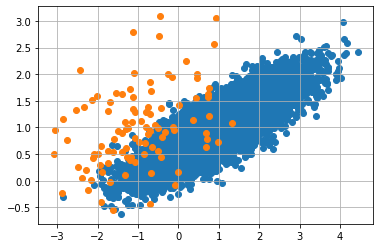

In [4]:
def visualize_2D_dataset(X, y):
    fig, axis = plt.subplots()
    
    for label in [0, 1]:
        mask = (y == label)
        X_selected = X[mask, :]
        axis.scatter(X_selected[:, 0], X_selected[:, 1], label=label)
    
    axis.grid(True)
    plt.show()

visualize_2D_dataset(X, y)

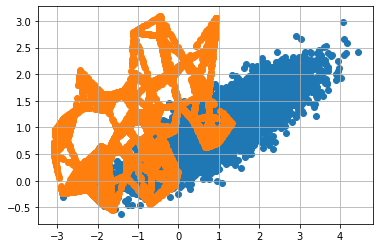

In [5]:
pipeline_upsample = Pipeline(steps=[("upsample", configs.conf_over_sampler_args["class"](**configs.conf_over_sampler_args["args"]))])
X_up, y_up = pipeline_upsample.fit_resample(X, y)
visualize_2D_dataset(X_up, y_up)

## 2. Fit after Data Augmentation

In [6]:
pipeline = Pipeline(steps=[("upsample", configs.conf_over_sampler_args["class"](**configs.conf_over_sampler_args["args"])),
                           ("normalizer", configs.conf_normalizer_args["class"](**configs.conf_normalizer_args["args"])),
                          ("svc", SVC(probability=True))])

In [7]:
model = BinaryClassifier(pipeline, configs.conf_SVC_cross_val_args, X, y, None)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.950) f1: (test=0.257) precision: (test=0.151) recall: (test=0.867) roc_auc: (test=0.959) total time=   7.3s
[CV 2/3] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.955) f1: (test=0.262) precision: (test=0.157) recall: (test=0.800) roc_auc: (test=0.933) total time=   6.6s
[CV 3/3] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.912) f1: (test=0.165) precision: (test=0.091) recall: (test=0.867) roc_auc: (test=0.910) total time=   5.8s
[CV 1/3] END svc__C=1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.953) f1: (test=0.268) precision: (test=0.159) recall: (test=0.867) roc_auc: (test=0.929) total time=   6.5s
[CV 2/3] END svc__C=1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.967) f1: (test=0.306) precision: (test=0.193) recall: (test=0.733) roc_auc: (test=0.865) total time=   5.5s
[CV 3/3] END svc__C=1, svc__gamma=1

In [8]:
cv_results = pd.DataFrame(model.cross_validator.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_roc_auc,split1_test_roc_auc,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,5.605870,0.544224,1.077699,0.066512,0.1,1,rbf,"{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...",0.958911,0.933300,...,0.090909,0.132978,0.029838,2,0.866667,0.800000,0.866667,0.844444,0.031427,1
1,4.827853,0.550958,0.908053,0.077349,1,1,rbf,"{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...",0.928732,0.864882,...,0.120192,0.157237,0.029731,1,0.866667,0.733333,0.833333,0.811111,0.056656,2


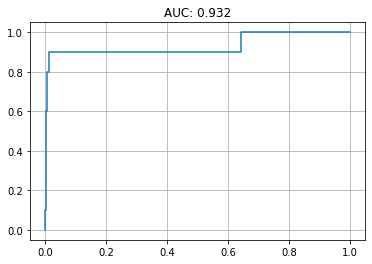

In [9]:
positive_probs, auc_score = model.predict_and_evaluate(True)

In [11]:
# positive_probs

## 3. Direct Fit

In [12]:
pipeline = Pipeline(steps=[("svc", SVC(probability=True))])
model = BinaryClassifier(pipeline, configs.conf_SVC_cross_val_args, X, y, None)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.990) f1: (test=0.065) precision: (test=1.000) recall: (test=0.033) roc_auc: (test=0.854) total time=   0.1s
[CV 2/3] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.990) f1: (test=0.065) precision: (test=1.000) recall: (test=0.033) roc_auc: (test=0.777) total time=   0.1s


D:\python\venvs\IML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END svc__C=0.1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.990) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.841) total time=   0.1s
[CV 1/3] END svc__C=1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.994) f1: (test=0.578) precision: (test=0.867) recall: (test=0.433) roc_auc: (test=0.861) total time=   0.2s
[CV 2/3] END svc__C=1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.994) f1: (test=0.591) precision: (test=0.929) recall: (test=0.433) roc_auc: (test=0.723) total time=   0.1s
[CV 3/3] END svc__C=1, svc__gamma=1, svc__kernel=rbf; accuracy: (test=0.996) f1: (test=0.750) precision: (test=1.000) recall: (test=0.600) roc_auc: (test=0.840) total time=   0.1s


## 4. Regressor

In [13]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from helpers.models import Regressor

In [14]:
X, y = make_regression(n_samples=1000, n_features=5, n_informative=5, random_state=0, noise=10)
# plt.scatter(X, y)
X.shape, y.shape

((1000, 5), (1000,))

In [15]:
pipeline = Pipeline(steps=[("normalize", configs.conf_normalizer_args["class"](**configs.conf_normalizer_args["args"])),
                          ("svr", SVR())])

In [16]:
model = Regressor(pipeline, configs.conf_SVR_cross_val_args, X, y, None)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END svr__C=1, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-96.991) r2: (test=0.058) total time=   0.0s
[CV 2/3] END svr__C=1, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-95.243) r2: (test=0.073) total time=   0.0s
[CV 3/3] END svr__C=1, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-93.189) r2: (test=0.082) total time=   0.0s
[CV 1/3] END svr__C=10, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-76.449) r2: (test=0.415) total time=   0.0s
[CV 2/3] END svr__C=10, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-76.322) r2: (test=0.405) total time=   0.0s
[CV 3/3] END svr__C=10, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-72.321) r2: (test=0.447) total time=   0.0s
[CV 1/3] END svr__C=100, svr__gamma=1, svr__kernel=rbf; neg_root_mean_squared_error: (test=-50.537) r2: (test=0.744) total time=   0.0

In [17]:
cv_results = pd.DataFrame(model.cross_validator.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__gamma,param_svr__kernel,params,split0_test_r2,split1_test_r2,split2_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.010411,0.007361,0.010417,0.007366,1,1,rbf,"{'svr__C': 1, 'svr__gamma': 1, 'svr__kernel': ...",0.058016,0.073113,0.081668,0.070932,0.009778,3,-96.990807,-95.243334,-93.189376,-95.141172,1.553608,3
1,0.010466,0.007404,0.015577,0.000070,10,1,rbf,"{'svr__C': 10, 'svr__gamma': 1, 'svr__kernel':...",0.414765,0.404814,0.446913,0.422164,0.017966,2,-76.449425,-76.321587,-72.320787,-75.030600,1.916838,2
2,0.035343,0.008775,0.014401,0.001084,100,1,rbf,"{'svr__C': 100, 'svr__gamma': 1, 'svr__kernel'...",0.744255,0.737278,0.758585,0.746706,0.008870,1,-50.537355,-50.707192,-47.780276,-49.674941,1.341524,1


In [18]:
pred, r2_score_val = model.predict_and_evaluate()
pred.shape, r2_score_val

((100,), 0.7698038831760444)